<center><h1>TP 3 - Data challenge</h1> </center>

Le but de ce TP est de vous faire participer à un data challenge kaggle du début à la fin. Le challenge en question est le suivant :
<center> <a>https://www.kaggle.com/c/titanic</a> </center>
Le principe est le suivant : vous disposez de deux jeux de données sur des passagers du titanic :
<ul>
    <li> Un jeu de données sur les passagers pour lequel le champ 'Survived' (qui indique la survie du passager) est connu, appelé donnée d'entrainement (train.csv) </li>
    <li> Un jeu de données pour lequel le champ 'Survived' est caché, appelé donnée test (test.csv)</li>
</ul>
<p>Le but du jeu est de construire une fonction qui prenne en entrée les informations sur un passager, et qui donne une prédiction de survie ou non du passager. Cette fonction sera construite grâce aux données dites d'entrainement, et sera évaluée sur les données de test (et soumise à l'évaluation sur kaggle, qui dispose de l'information cachée).</p>

<h2> Prise en main du problème </h2>
Lire en détails la page du data challenge "titanic", prendre connaissance en particulier de la nature des données, et de ce qui est attendu comme soumission de fichier pour obtenir un classement.

<h2>Chargement et traitement de données </h2>
    Charger, à l'aide de pandas les fichiers train.csv et test.csv, les concaténer afin de procéder à des traitement identiques sur les deux jeux de données. Enfin afficher les DataFrames obtenus.

In [146]:
import pandas as pd 
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')

Y-a-t-il a priori des données qui ne sont pas à prendre en compte pour prédire la survie du passager ? Supprimer ces données du DataFrame.

In [147]:
titanic_df = pd.concat([df,df1], ignore_index = True, sort = False)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [148]:
#supprimer les colonnes initules
del titanic_df["Name"]
del titanic_df["Cabin"]
del titanic_df["Fare"]
del titanic_df["Ticket"]



In [149]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0.0,3,male,22.0,1,0,S
1,2,1.0,1,female,38.0,1,0,C
2,3,1.0,3,female,26.0,0,0,S
3,4,1.0,1,female,35.0,1,0,S
4,5,0.0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,S
1305,1306,NaN,1,female,39.0,0,0,C
1306,1307,NaN,3,male,38.5,0,0,S
1307,1308,NaN,3,male,NaN,0,0,S


Y-a-t-il des données manquantes ? Sur quelles propriétés ? Pensez à jeter un coup d'oeil à la doc de pandas sur le sujet :
<p><center><a>https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html</a></center></p>
<p>Remplacer les données manquantes par des valeurs spéciales, et rajouter un champ au DataFrame pour indiquer l'existence ou non d'une donnée manquante sur cette propriété. </p> 
<p>Exemple:</p>

In [ ]:
import pandas as pd
import numpy as np
# On crée une dataframe avec des données manquantes (np.nan)
dat=pd.DataFrame({"score":[1,-2,3,10],'tricheur':[np.nan,'non',np.nan,'oui']})
dat

In [ ]:
# On rajoute une colonne disant si l'on a une valeur manquante au champ 'tricheur'
dat['sait-on ?']=dat['tricheur'].isna()
# On remplace la donnée manquante par la valeur spéciale 'je sais pas'
dat=dat.fillna('je sais pas')
dat

Transformer toutes les variables catégorielles données par des chaines de caractères par des variables numériques.

In [150]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [151]:
titanic_df.shape

(1309, 8)

In [152]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [155]:
#on va remplire les valeurs manquantes
titanic_df['Survived'].fillna(titanic_df["Survived"].mode().iloc[0], inplace=True)
titanic_df['Age'].fillna(titanic_df["Age"].mode().iloc[0], inplace=True)
titanic_df['Embarked'].fillna(titanic_df["Embarked"].mode().iloc[0], inplace=True)
titanic_df.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [189]:
titanic_df['Sex']=titanic_df['Sex'].replace(['female','male'],[0,1])
titanic_df["Embarked"]=titanic_df["Embarked"].replace(['S', 'C', 'Q'],[0,1,2])
titanic_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,sex
0,1,0.0,3,1,22.0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,1,0
2,3,1.0,3,0,26.0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,0,0
4,5,0.0,3,1,35.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,1,24.0,0,0,0,1
1305,1306,0.0,1,0,39.0,0,0,1,0
1306,1307,0.0,3,1,38.5,0,0,0,1
1307,1308,0.0,3,1,24.0,0,0,0,1


<h2> Description des données </h2>

Afficher les histogrammes de chacune des propriétés, pour l'ensemble du DataFrame, puis pour les survivants uniquements et enfin pour les non-survivants. Notez-vous des différences évidentes ? Sur quelles variables ?
Afficher la matrice de corrélation de vos données.

<AxesSubplot:ylabel='Survived'>

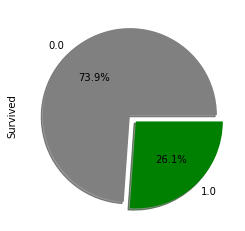

In [193]:
import matplotlib.pyplot as plt 
titanic_df['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               shadow = True,
                                               colors = ['grey', 'green'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

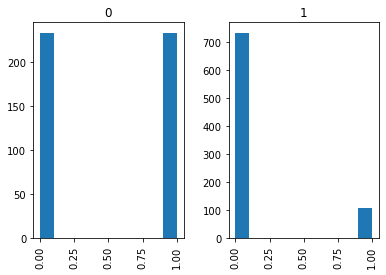

In [197]:
titanic_df.hist('Survived',"Sex")

<h2> Un premier modèle médiocre </h2>

<p>On remarque assez vite que le sexe du passager semble être un bon indicateur : dans le jeu de données d'entraînement, environ 75% des survivants sont des femmes. Si on ne prédit que sur ce critère, il semblerait que l'on ne se trompe pas dans la majorité des cas.</p>
Estimer empiriquement à partir du jeu de données d'entrainement $P(F|S)$, $P(F)$, $P(S)$ où $S$ est l'évènement "le passager survit", $F$ est l'évènement "Le passager est une femme". En déduire $P(S|F)$.


In [207]:
P_f=titanic_df["Sex"].mean()
p_s=titanic_df["Survived"].mean()
p_cod=titanic_df.loc[titanic_df["Survived"]==1]["Sex"].mean()
p_cod

0.31871345029239767

En déduire une prédiction pour le jeu de données test, basée sur ce seul critère. Ranger cette prédiction de survie dans un DataFrame qui ne possède que deux champs : "PassengerId" et "Survived".

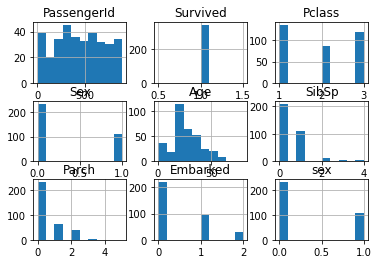

In [209]:
titanic_df[titanic_df["Survived"]==1].hist();

In [211]:
titanic_df.loc[titanic_df["Sex"]==0]["Survived"].mean()

0.5

Sauvegardez ce DataFrame dans un Fichier .csv avec le format attendu dans le Challenge, et soumettez-le. Quel score obtenez-vous ? Est-ce conforme à vos attentes ?

<h2> Utilisation de méthodes de classification </h2>

<p>Les méthodes de classification consistent en la construction de fonction (aussi appelés modèles) qui ont vocation à prendre en entrée des données multivariées. Il existe une zoologie importante de telles méthodes, dont l'efficacité dépend bien évidemment de la nature du problème à traiter.</p>
La bibliothèque scikit-learn propose une grand nombre de modèles pour la classification :

<p><center><a>https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html</p></center></a>







<p>Testons le modèles des plus proches voisins. Le principe est assez simple. Considérons un jeu de données $(X_k,y_k)_{k=1..M}$ où $X_k \in \mathbb{R}^N$ sont les variables explicatives, et $y_k$ appartient à un ensemble dénombrable fini indiquant la catégorie à laquelle appartient $X_k$ (par exemple $\{"survivant","mort"\}$). Pour une donnée à classifier, disons $X$, le modèle détermine les $k$ plus proches voisins de $X$ et détermine quelle catégorie est en majorité parmi ces voisins. Cette catégorie est alors utilisée comme prédiction. </p>

<p>La page suivante fournit plus d'informations techniques sur cette méthode :</p>

<p><center><a>https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification</a></center></p>



Sélectionner un certain nombre de propriétés de votre DataFrame qui vous serviront pour effectuer vos prédictions, et centrer/renormaliser ces données. Mettre en oeuvre la méthodes des k plus proches voisins pour prédire la survie des passagers dans les données de test, soumettez votre score, est-il meilleur que le premier ?

Testez d'autres modèles de classification : SVM, arbres de décision... parvenez-vous à améliorer votre score ?